## 워드클라우드

#### 필요한 패키지 불러오기:

In [2]:
#처음엔 설치 필요!
!pip install wordcloud
!pip install nltk
# 다음은 한번만 실행한다.
#nltk.download()
from wordcloud import WordCloud
import numpy as np
import pandas as pd
import nltk
import re
import os
import matplotlib.pyplot as plt
from PIL import Image                         # Pillow 패키지의 영상 핸들링 클래스.
#from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
%matplotlib inline

#### 데이터 읽어오기:

In [3]:
os.chdir(r"C:\Users\Gram\Desktop\myPyCode\02  데이터 수집과 처리 - 실습\data")
f = open("./book_three_little_pigs.txt",'r',encoding='UTF-8')
my_book = f.readlines()
f.close()

#### 전처리:

In [4]:
n_min = 4                                                           # 최소 문자 개수. 
corpus = []     #전체문자자료
for a_line in my_book:
    pre = re.sub(r'\W', ' ', a_line)                                # 특수문자를 스페이스로 대체.
    pre = re.sub(r'_', ' ', pre)                                    # _를 스페이스로 대체.
    pre = re.sub(r'\d+','', pre)                                    # 숫자는 제외. 
    pre = nltk.word_tokenize(pre)   #워드단위로 쪼갬
    pre = [x for x in pre if len(x) > n_min]                        # 하나의 단어x를 가져와 길이가 4이상len(x)이면 가져옴 
    pre = [x.lower() for x in pre]                                  # 소문자화(정규화). 값을가져와 소문자한다음 다시 리스트만듬
    pre = [x for x in pre if x not in stopwords.words('english')]   # 불용어 처리. pre라는 리스트에서 단어가져와서 불용어사전에 없으면 리스트 만들기
    corpus += pre                                                   # 단어를 말뭉치에 추가.  # 말뭉치corpus에 포함시킴

#### 키워드 추출 (Option):

In [5]:
# Series 로 변환.
my_series = pd.Series(corpus)   #corpus로 시리즈 만듬

In [6]:
# 도수 분포표. Top 10
my_word_counts = my_series.value_counts().sort_values(ascending=False)  #시리즈를 valuecounts하고 도수분포표 만들어 내림차순으로 소팅
my_word_counts[:10]  #top 10 보기

little        33
house         14
huffed         6
puffed         6
ready          5
frightened     4
coming         4
apples         3
please         3
could          3
dtype: int64

#### 워드 클라우드 기본형 생성:

In [7]:
# 다음은 워드클라우드의 요구사항.
a_long_sentence = ' '.join(corpus)  #long_sentence로 조인

In [8]:
wc = WordCloud(background_color='white', max_words=30)  #워드클라우드객체를 만듬   #바탕색, 단어 개수 등 설정.
wc.generate(a_long_sentence)   #학습이 되기위해 학습데이터 long_sentence 넣어줌
wc.words_                      #단어와 단어의 가중치(옵션)

{'little': 1.0,
 'house': 0.42424242424242425,
 'huffed': 0.18181818181818182,
 'puffed': 0.18181818181818182,
 'ready': 0.15151515151515152,
 'apple': 0.12121212121212122,
 'coming': 0.12121212121212122,
 'frightened': 0.12121212121212122,
 'please': 0.09090909090909091,
 'build': 0.09090909090909091,
 'built': 0.09090909090909091,
 'chiny': 0.09090909090909091,
 'bricks': 0.09090909090909091,
 'clock': 0.09090909090909091,
 'churn': 0.09090909090909091,
 'three': 0.06060606060606061,
 'bundle': 0.06060606060606061,
 'straw': 0.06060606060606061,
 'along': 0.06060606060606061,
 'answered': 0.06060606060606061,
 'furze': 0.06060606060606061,
 'field': 0.06060606060606061,
 'turnips': 0.06060606060606061,
 'tomorrow': 0.06060606060606061,
 'morning': 0.06060606060606061,
 'dinner': 0.06060606060606061,
 'angry': 0.06060606060606061,
 'bought': 0.06060606060606061,
 'butter': 0.06060606060606061,
 'going': 0.06060606060606061}

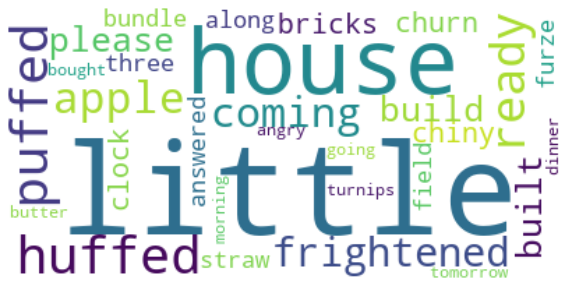

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')   # imshow로 시각화   #인터는 옵션임
plt.axis("off")                            # 축을 꺼줌. 안끄면 가로축 세로축보여서 지저분해 보임
plt.show()

#### 워드 클라우드 매스크 사용형 생성:

In [10]:
# 백그라운드 마스크
#img = Image.open('background_1.png')                    # 타원형.
#img = Image.open('background_2.png')                    # 말풍선.
img = Image.open('background_3.png')                     # 하트.     
back_mask = np.array(img)                                # 열어서 numpy배열로 변환 

In [11]:
wc = WordCloud(background_color='white', max_words=30, mask=back_mask)            # 바탕색, 단어 개수 등 설정.
wc.generate(a_long_sentence)  #mask 인자값을 넣으면 백그라운드(하트모양) 있게 나옴-data에 있음

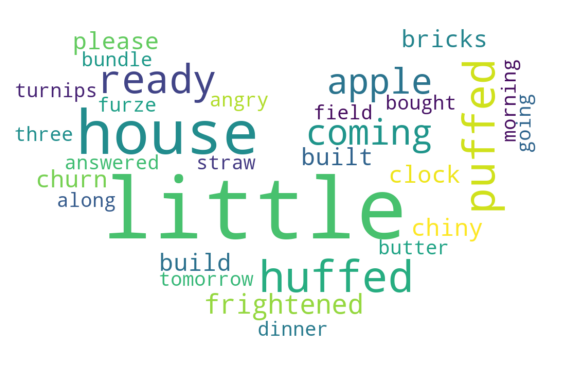

In [12]:
plt.figure(figsize=(10,10))    
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")                                    # 축을 꺼줌.
plt.show()